[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aurelio-labs/langchain-course/blob/main/chapters/01-intro.ipynb)

#### LangChain Essentials Course

# Getting Started with LangChain

LangChain is one of the most popular open source libraries for AI Engineers. It's goal is to abstract away the complexity in building AI software, provide easy-to-use building blocks, and make it easier when switching between AI service providers.

In this example, I am trying LangChain and will build a simple LLM-powered assistant. 

I am currently using OpenAI's `gpt-4o-mini` *and* Meta's `llama3.2` via Ollama!

In [64]:
!pip install -qU \
  langchain-core==0.3.33 \
  langchain-openai==0.3.3 \
  langchain-community==0.3.16

# this is for colab install only

## Initializing OpenAI's gpt-4o-mini

Things i do in the following cell:

1. I start by initializing the LLM. 
2. I use OpenAI's `gpt-4o-mini` model, 
3. To do that, i got an API key from [OpenAI's website](https://platform.openai.com/settings/organization/api-keys).

In [67]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or getpass(
    "Enter OpenAI API Key: "
)

openai_model = "gpt-4o-mini"

In [68]:
from langchain_openai import ChatOpenAI

# For normal accurate responses
llm = ChatOpenAI(temperature=0.0, model=openai_model)

# For unique creative responses
creative_llm = ChatOpenAI(temperature=0.9, model=openai_model)

I take an `article` _draft_ and use LangChain to generate various useful items around this article. 

By the end of this notebook, I'll be creating:

1. An article title
2. An article description
3. Editor advice where we will insert an additional paragraph in the article
4. A thumbnail / hero image for our article.

Here I input the article to start with - An article about Greek philosophy.

In [69]:
article = """
\
Greek philosophy, in the history of Western philosophy, the foundational and profound philosophical contributions of the leading thinkers of ancient Greece, including the pre-Socratic cosmologists of the 6th and 5th centuries bce; the intellectual giants of Classical Athens—Socrates, Plato, and Aristotle; and the Hellenistic founders of Stoicism, Epicureanism, and other major schools of Greco-Roman philosophy.

## Monistic cosmologies

Thales is considered the first Greek philosopher because he was the first to give a purely natural explanation of the origin of the world, free from mythological ingredients. He held that everything had come out of water—an explanation based on the discovery of fossil sea animals far inland. His tendency (and that of his immediate successors) to give nonmythological explanations was undoubtedly prompted by the fact that all of them lived on the coast of Asia Minor, surrounded by a number of nations whose civilizations were much further advanced than that of the Greeks and whose own mythological explanations varied greatly. It appeared necessary, therefore, to make a fresh start on the basis of what a person could observe and infer by looking at the world as it presented itself. This procedure naturally resulted in a tendency to make sweeping generalizations on the basis of rather restricted, though carefully checked, observations.

Thales’ disciple and successor, Anaximander of Miletus (610–c. 546 bce), tried to give a more elaborate account of the origin and development of the ordered world (the cosmos). According to him, it developed out of the apeiron (“unlimited”), something both infinite and indefinite (without distinguishable qualities). Within this apeiron something arose to produce the opposites of hot and cold. These at once began to struggle with each other and produced the cosmos. The cold (and wet) partly dried up (becoming solid earth), partly remained (as water), and—by means of the hot—partly evaporated (becoming air and mist), its evaporating part (by expansion) splitting up the hot into fiery rings, which surround the whole cosmos. Because these rings are enveloped by mist, however, there remain only certain breathing holes that are visible to human beings, appearing to them as the Sun, Moon, and stars. Anaximander was the first to realize that upward and downward are not absolute but that downward means toward the middle of the Earth and upward away from it, so that the Earth had no need to be supported (as Thales had believed) by anything. Starting from Thales’ observations, Anaximander tried to reconstruct the development of life in more detail. Life, being closely bound up with moisture, originated in the sea. All land animals, he held, are descendants of sea animals; because the first humans as newborn infants could not have survived without parents, Anaximander believed that they were born within an animal of another kind—specifically, a sea animal in which they were nurtured until they could fend for themselves. Gradually, however, the moisture will be partly evaporated until in the end all things will return into the undifferentiated apeiron, “in order to pay the penalty for their injustice”—that of having struggled against one another.

Anaximander’s successor, Anaximenes of Miletus (flourished c. 545 bce), taught that air was the origin of all things. His position was for a long time thought to have been a step backward because, like Thales, he placed a special kind of matter at the beginning of the development of the world. But this criticism missed the point. Neither Thales nor Anaximander appear to have specified the way in which the other things arose out of water or apeiron. Anaximenes, however, declared that the other types of matter arose out of air by condensation and rarefaction. In this way, what to Thales had been merely a beginning became a fundamental principle that remained essentially the same through all of its transmutations. Thus, the term arche, which originally simply meant “beginning,” acquired the new meaning of “principle,” a term that henceforth played an enormous role in philosophy down to the present. This concept of a principle that remains the same through many transmutations is, furthermore, the presupposition of the idea that nothing can come out of nothing and that all of the comings to be and passings away that human beings observe are nothing but transmutations of something that essentially remains the same eternally. In this way it also lies at the bottom of all of the conservation laws—the laws of the conservation of matter, force, and energy—that have been basic in the development of physics. Although Anaximenes of course did not realize all of the implications of his idea, its importance can hardly be exaggerated.

The first three Greek philosophers have often been called “hylozoists,” because they seemed to believe in a kind of living matter (see hylozoism). But this is hardly an adequate characterization. It is, rather, characteristic of them that they did not clearly distinguish between kinds of matter, forces, and qualities, nor between physical and emotional qualities. The same entity is sometimes called “fire” and sometimes “the hot.” Heat appears sometimes as a force and sometimes as a quality, and again there is no clear distinction between warm and cold as physical qualities and the warmth of love and the cold of hate. To realize these ambiguities is important to an understanding of certain later developments in Greek philosophy.

Xenophanes of Colophon (c. 560–c. 478 bce), a rhapsodist and philosophical thinker who emigrated from Asia Minor to Elea in southern Italy, was the first to articulate more clearly what was implied in Anaximenes’ philosophy. He criticized the popular notions of the gods, saying that people made the gods in their own image. But, more importantly, he argued that there could be only one God, the ruler of the universe, who must be eternal. For, being the strongest of all beings, he could not have come out of something less strong, nor could he be overcome or superseded by something else, because nothing could arise that is stronger than the strongest. The argument clearly rested on the axioms that nothing can come out of nothing and that nothing that exists can vanish.

These axioms were made more explicit and carried to their logical (and extreme) conclusions by Parmenides of Elea (born c. 515 bce), the founder of the so-called school of Eleaticism, of whom Xenophanes has been regarded as the teacher and forerunner. In a philosophical poem, Parmenides insisted that “what is” cannot have come into being and cannot pass away because it would have to have come out of nothing or to become nothing, whereas nothing by its very nature does not exist. There can be no motion either, for it would have to be a motion into something that is—which is not possible since it would be blocked—or a motion into something that is not—which is equally impossible since what is not does not exist. Hence, everything is solid, immobile being. The familiar world, in which things move around, come into being, and pass away, is a world of mere belief (doxa). In a second part of the poem, however, Parmenides tried to give an analytical account of this world of belief, showing that it rested on constant distinctions between what is believed to be positive—i.e., to have real being, such as light and warmth—and what is believed to be negative—i.e., the absence of positive being, such as darkness and cold.

It is significant that Heracleitus of Ephesus (c. 540–c. 480 bce), whose philosophy was later considered to be the very opposite of Parmenides’ philosophy of immobile being, came, in some fragments of his work, near to what Parmenides tried to show: the positive and the negative, he said, are merely different views of the same thing; death and life, day and night, and light and darkness are really one.

"""

## Preparing the Prompts

LangChain comes with several prompt classes and methods for organizing or constructing our prompts. The following exmaples cover the essentials.

Prompts for chat agents are at a minimum broken up into three components, those are:

* System prompt: this provides the instructions to the LLM on how it must behave, what it's objective is, etc.

* User prompt: this is a user written input.

* AI prompt: this is the AI generated output. When representing a conversation, previous generations will be inserted back into the next prompt and become part of the broader _chat history_.

```
You are a helpful AI assistant, you will do XYZ.    | SYSTEM PROMPT

User: Hi, what is the capital of Australia?         | USER PROMPT
AI: It is Canberra                                  | AI PROMPT
User: When is the best time to visit?               | USER PROMPT
```

LangChain provides with _templates_ for each of these prompt types. By using templates we can insert different inputs to the template, modifying the prompt based on the provided inputs.

Let's initialize our system and user prompt first:

In [33]:
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

# Defining the system prompt (how the AI should act)
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps generate article titles."
)

# the user prompt is provided by the user, in this case however the only dynamic
# input is the article
user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a name for a article.
The article is here for you to examine {article}

The name should be based of the context of the article.
Be creative, but make sure the names are clear, catchy,
and relevant to the theme of the article.

Only output the article name, no other explanation or
text can be provided.""",
    input_variables=["article"]
)

We can display what our formatted human prompt would look like after inserting a value into the `article` parameter:

In [70]:
print(user_prompt.format(article="TEST STRING").content)

You are tasked with creating a name for a article.
The article is here for you to examine TEST STRING

The name should be based of the context of the article.
Be creative, but make sure the names are clear, catchy,
and relevant to the theme of the article.

Only output the article name, no other explanation or
text can be provided.


We have our system and user prompts, we can merge both into our full chat prompt using the `ChatPromptTemplate`:

In [35]:
from langchain.prompts import ChatPromptTemplate

first_prompt = ChatPromptTemplate.from_messages([system_prompt, user_prompt])

By default, the `ChatPromptTemplate` will read the `input_variables` from each of the prompt templates inserted and allow us to use those input variables when formatting the full chat prompt template:

In [36]:
print(first_prompt.format(article="TEST STRING"))

System: You are an AI assistant that helps generate article titles.
Human: You are tasked with creating a name for a article.
The article is here for you to examine TEST STRING

The name should be based of the context of the article.
Be creative, but make sure the names are clear, catchy,
and relevant to the theme of the article.

Only output the article name, no other explanation or
text can be provided.


`ChatPromptTemplate` also prefixes each individual message with it's role, ie `System:`, `Human:`, or `AI:`.

We can chain together our `first_prompt` template and the `llm` object we defined earlier to create a simple LLM chain. This chain will perform the steps **prompt formatting > llm generation > get output**.

We'll be using **L**ang**C**hain **E**xpression **L**anguage (LCEL) to construct our chain. 

We define our inputs with the first dictionary segment (ie `{"article": lambda x: x["article"]}`) and then we use the pipe operator (`|`) to say that the output from the left of the pipe will be fed into the input to the right of the pipe.

In [71]:
chain_one = (
    {"article": lambda x: x["article"]}
    | first_prompt
    | creative_llm
    | {"article_title": lambda x: x.content}
)

Our first chain creates the article title, note: we can run all of these individually...

In [72]:
article_title_msg = chain_one.invoke({"article": article})
article_title_msg

{'article_title': '"From Water to Apeiron: The Birth of Greek Cosmology"'}

But we will actually chain this step with multiple other `LLMChain` steps. So, to continue, our next step is to summarize the article using both the `article` and newly generated `article_title` values, from which we will output a new `summary` variable:

In [73]:
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps builds article titles."
)


second_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a description for
the article. The article is here for you to examine:

---

{article}

---

Here is the article title '{article_title}'.

Output the SEO friendly article description, make sure we dont exceed more than 120 characters. Do not output
anything other than the description.""",
    input_variables=["article", "article_title"]
)

second_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    second_user_prompt
])

In [75]:
chain_two = (
    {
        "article": lambda x: x["article"],
        "article_title": lambda x: x["article_title"]
    }
    | second_prompt
    | llm
    | {"summary": lambda x: x.content}
)

In [76]:
article_description_msg = chain_two.invoke({
    "article": article,
    "article_title": article_title_msg["article_title"]
})
article_description_msg

{'summary': "Explore the origins of Greek cosmology, from Thales' water theory to Anaximander's apeiron and beyond."}

The third step will consume our first `article` variable and provide several output fields, focusing on helping the user improve a part of their writing. As we are outputting multiple fields we can specify for the LLM to use structured outputs, keeping the generated fields aligned with our requirements.

In [78]:
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps builds and reviews article paragraphs."
)

third_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a new paragraph for the
article. The article is here for you to examine:

---

{article}

---

Choose one paragraph to review and edit. During your edit
ensure you provide constructive feedback to the user so they
can learn where to improve their own writing.""",
    input_variables=["article"]
)

# prompt template 3: creating a new paragraph for the article
third_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    third_user_prompt
])

We create a pydantic object describing the output format we need. This format description is then passed to our model using the `with_structured_output` method:

In [46]:
from pydantic import BaseModel, Field

class Paragraph(BaseModel):
    original_paragraph: str = Field(description="The original paragraph")
    edited_paragraph: str = Field(description="The improved edited paragraph")
    feedback: str = Field(description=(
        "Constructive feedback on the original paragraph"
    ))

structured_llm = creative_llm.with_structured_output(Paragraph)

Now we put all of this together in another chain:

In [79]:
# chain 3: inputs: article / output: article_para
chain_three = (
    {"article": lambda x: x["article"]}
    | third_prompt
    | structured_llm
    | {
        "original_paragraph": lambda x: x.original_paragraph,
        "edited_paragraph": lambda x: x.edited_paragraph,
        "feedback": lambda x: x.feedback
    }
)

In [80]:
out = chain_three.invoke({"article": article})
out

{'original_paragraph': 'Thales is considered the first Greek philosopher because he was the first to give a purely natural explanation of the origin of the world, free from mythological ingredients. He held that everything had come out of water—an explanation based on the discovery of fossil sea animals far inland. His tendency (and that of his immediate successors) to give nonmythological explanations was undoubtedly prompted by the fact that all of them lived on the coast of Asia Minor, surrounded by a number of nations whose civilizations were much further advanced than that of the Greeks and whose own mythological explanations varied greatly. It appeared necessary, therefore, to make a fresh start on the basis of what a person could observe and infer by looking at the world as it presented itself. This procedure naturally resulted in a tendency to make sweeping generalizations on the basis of rather restricted, though carefully checked, observations.',
 'edited_paragraph': "Thales 

Now we want this article to look appealing, so we need to grab an image based of our article! However the prompt for the article image `cannot be over 1000 letters` so this has to be short in case we want to add anything in such as `style` later on.

In [82]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate

image_prompt = PromptTemplate(
    input_variables=["article"],
    template=(
        "Generate a prompt with less then 500 characters to generate an image "
        "based on the following article: {article}"
    )
)

The `generate_and_display` function will generate the article image once we have the prompt from our image prompt.

In [61]:
from skimage import io
import matplotlib.pyplot as plt
from langchain_core.runnables import RunnableLambda

def generate_and_display_image(image_prompt):
    image_url = DallEAPIWrapper(model="dall-e-3").run(image_prompt)
    image_data = io.imread(image_url)

    # And update the display code to:
    plt.imshow(image_data)
    plt.axis('off')
    plt.show()

# we wrap this in a RunnableLambda for use with LCEL
image_gen_runnable = RunnableLambda(generate_and_display_image)

We have all of our image generation components ready, we chain them together again with LCEL:

In [62]:
# chain 4: inputs: article, article_para / outputs: new_suggestion_article
chain_four = (
    {"article": lambda x: x["article"]}
    | image_prompt
    | llm
    | (lambda x: x.content)
    | image_gen_runnable
)

And now, we `invoke` our final chain:

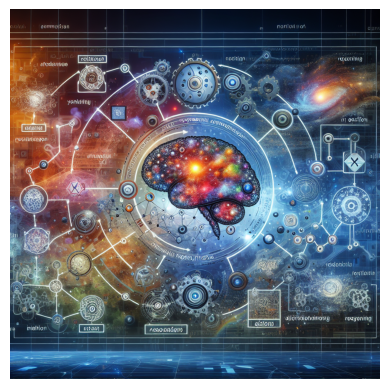

In [63]:
chain_four.invoke({"article": article})

With that we've built LLM chains that can help us building and writing articles. We've understood a few of the basics of LangChain, introduced **L**ang**C**hain **E**xpression **L**anguage (LCEL), and built a multi-modal article-helper pipeline.